In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\innomatics\dominos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.shape

(15000, 3)

In [4]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


#### Change the data type of order_placed_at and order-delivered_at to datetime

In [6]:
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [7]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [8]:
df.isna().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

#### No mising row.

## Performance Metric
### `95th Percentile of Order Delivery time should be less than 31 mins.`

### Create a column delivery_time

In [9]:
df['delivery_time']=(df['order_delivered_at']-df['order_placed_at'])
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056


#### Make delivery time in minutes

In [10]:
import datetime as dt

In [11]:
df['delivery_time']=pd.to_timedelta(df.delivery_time).dt.components.iloc[:,2]
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16


In [12]:
print("Average Delivery Time", df['delivery_time'].mean())
print("Median Delivery TIme", df['delivery_time'].median())
print("Minimum Delivery Time", df['delivery_time'].min())
print("Maximum Delivery Time", df['delivery_time'].max())
print("25% of Delivery TIme", df['delivery_time'].quantile(0.25))
print("50% of Delivery TIme", df['delivery_time'].quantile(0.50))
print("75% of Delivery TIme", df['delivery_time'].quantile(0.75))
print("90% of Delivery TIme", df['delivery_time'].quantile(0.90))
print("95% of Delivery TIme", df['delivery_time'].quantile(0.95))
print("96% of Delivery TIme", df['delivery_time'].quantile(0.96))
print("97% of Delivery TIme", df['delivery_time'].quantile(0.97))
print("98% of Delivery TIme", df['delivery_time'].quantile(0.98))
print("99% of Delivery TIme", df['delivery_time'].quantile(0.99))

Average Delivery Time 16.980666666666668
Median Delivery TIme 15.0
Minimum Delivery Time 0
Maximum Delivery Time 59
25% of Delivery TIme 15.0
50% of Delivery TIme 15.0
75% of Delivery TIme 17.0
90% of Delivery TIme 20.0
95% of Delivery TIme 25.0
96% of Delivery TIme 27.0
97% of Delivery TIme 30.0
98% of Delivery TIme 34.0
99% of Delivery TIme 42.0


#### `97% deliveries are within 31 minutes`

### Distribution of delivery time

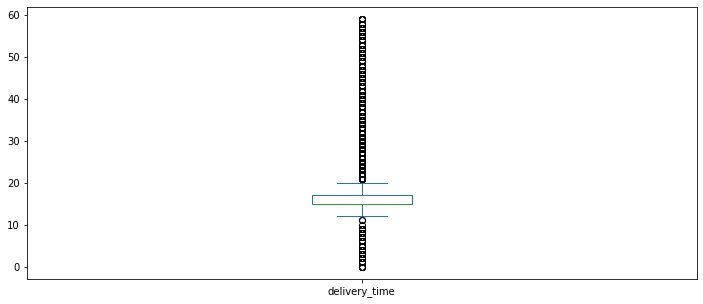

In [13]:
df['delivery_time'].plot(kind='box', figsize=(12,5), );

#### `Delivery time for many orders is above the 30 minutes.`

<AxesSubplot:ylabel='Frequency'>

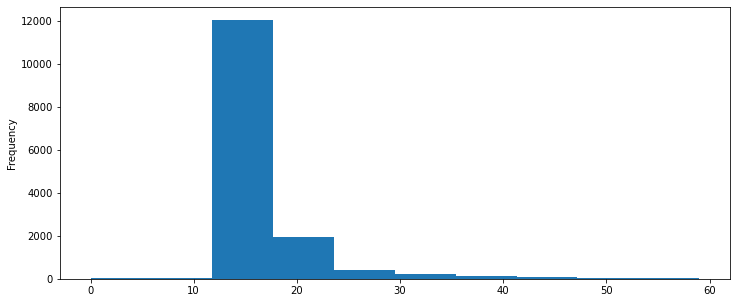

In [14]:
df['delivery_time'].plot(kind='hist', figsize=(12,5))

#### `Most of the deliveries done within 10 to 20 minutes.`

### Percentage of total deliveries done by Minutes

In [15]:
df['delivery_time'].nunique()

60

In [16]:
delivery_stats=pd.DataFrame(df['delivery_time'].value_counts().values, index=df['delivery_time'].value_counts().index)
delivery_stats.reset_index(inplace=True)
delivery_stats.columns=['delivery_time(min)','total_deliveries']
delivery_stats['percentage_deliveries(%)']=(delivery_stats['total_deliveries']/15000*100).round(2)
delivery_stats

,delivery_time(min),total_deliveries,percentage_deliveries(%)
0,15,8410,56.07
1,16,2471,16.47
2,17,1166,7.77
3,18,694,4.63
4,19,442,2.95
5,20,295,1.97
6,21,237,1.58
7,22,170,1.13
8,23,126,0.84
9,24,110,0.73


#### `Out of total deliveries, 88% deliveries done in range of 15 to 20 minutes.`

### Total orders by day

In [17]:
(df['order_placed_at'].dt.date).value_counts()

2023-03-20    597
2023-03-22    591
2023-03-02    588
2023-03-10    587
2023-03-23    583
2023-03-06    582
2023-03-12    582
2023-03-08    578
2023-03-07    570
2023-03-04    567
2023-03-24    565
2023-03-09    564
2023-03-18    559
2023-03-27    551
2023-03-05    551
2023-03-01    550
2023-03-25    547
2023-03-16    545
2023-03-15    540
2023-03-17    537
2023-03-11    536
2023-03-03    534
2023-03-26    532
2023-03-19    526
2023-03-13    526
2023-03-21    520
2023-03-14    492
Name: order_placed_at, dtype: int64

<AxesSubplot:>

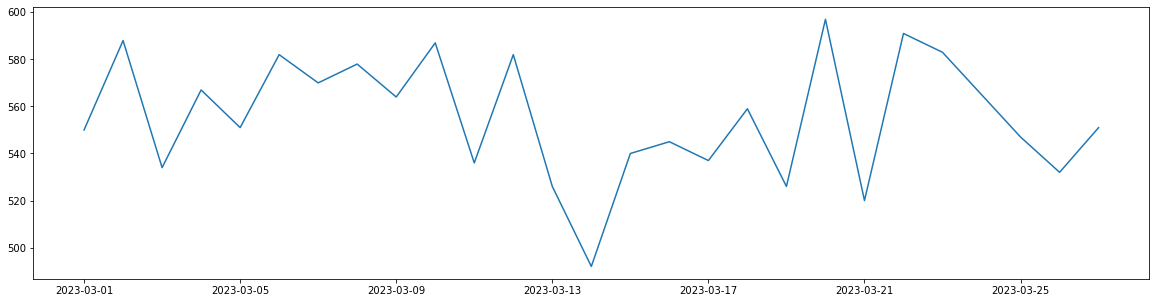

In [52]:
(df['order_placed_at'].dt.date).value_counts().plot(kind='line', figsize=(20,5))

#### `Every day from 1st March 2023 to 27th March 2023, between 500 to 600 orders has been placed., Maximum orders placed on 20th March and minimum order on 14th March.`

### Total orders by Weekday

In [18]:
order_by_weekday=pd.DataFrame((df['order_placed_at'].dt.weekday).value_counts())
order_by_weekday.reset_index(inplace=True)
order_by_weekday.columns=['weekday','toral_orders']
order_by_weekday['perc_order']=(order_by_weekday['toral_orders']/15000*100).round(2)
order_by_weekday

,weekday,toral_orders,perc_order
0,3,2280,15.20
1,2,2259,15.06
2,0,2256,15.04
3,4,2223,14.82
4,5,2209,14.73
5,6,2191,14.61
6,1,1582,10.55


#### `On Thursday Most orders about 15.20% of total orders has been placed, and on Tuesday least orders ie only 10% of total orders has placed.`
#### `Every week day almost 2200 orders  i.e about 15% of total orders has been placed, but on Tuesday only 1582 orders i.e 10% of total orders has placed.`

### Total order by week

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
order_by_week=pd.DataFrame((df['order_placed_at'].dt.week).value_counts())
order_by_week.reset_index(inplace=True)
order_by_week.columns=['week','toral_orders']
order_by_week['perc_order']=(order_by_week['toral_orders']/15000*100).round(2)
order_by_week

,week,toral_orders,perc_order
0,10,3999,26.66
1,12,3935,26.23
2,11,3725,24.83
3,9,2790,18.60
4,13,551,3.67


#### `In first week of March 2790(18.60%) orders has been placed, 3999(26.66%) orders in second week, 3725(24.83%) orders in third week, 3935(26.23%) orders in forth week, and 551(3.67%) orders in last week of march, this is obvious because we have data till 27th March.`

### Total order by time of a day

In [40]:
time=pd.DataFrame(df['order_placed_at'].dt.hour)
time.columns=['hour']
time

,hour
0,0
1,0
2,0
3,0
4,0
...,...
14995,23
14996,23
14997,23
14998,23


In [49]:
time['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [44]:
def time_period(hour):
    if (hour>=0 and hour<=6):
        return '12AM-6AM'
    elif (hour>6 and hour<12):
        return '6AM-12PM'
    elif (hour>=12 and hour<=18):
        return '12PM-6PM'
    else:
        return '6PM-12AM'
    
time['time_period']=time['hour'].apply(time_period)
time.head()

,hour,time_period
0,0,12AM-6AM
1,0,12AM-6AM
2,0,12AM-6AM
3,0,12AM-6AM
4,0,12AM-6AM


In [46]:
order_by_time=pd.DataFrame(time['time_period'].value_counts())
order_by_time.reset_index(inplace=True)
order_by_time.columns=['time_period', 'total_orders']
order_by_time['perc_order']=(order_by_time['total_orders']/15000*100).round(2)
order_by_time

,time_period,total_orders,perc_order
0,12AM-6AM,4402,29.35
1,12PM-6PM,4330,28.87
2,6PM-12AM,3190,21.27
3,6AM-12PM,3078,20.52


#### `Maximum orders are between 12AM to 6AM, about 30%(4402). 29% orders are between 12PM to 6PM, 21% orders are between 6PM to 12AM and 20% orders between 6AM to 12PM.`

## Inference:
#### 1.  97% deliveries are within 31 minutes.
#### 2.  Average Delivery Time is 17 minutes, Maximum and minimum deliver time is 59 and 0 minutes respectively.
#### 3.  Out of total deliveries, 88% deliveries done in time range of 15 to 20 minutes.
#### 4.  Every day from 1st March 2023 to 27th March 2023, 500 to 600 orders has been placed.
#### 5.  Maximum orders placed on 20th March and minimum order on 14th March.
#### 6.  On Thursday Most orders about 15.20% of total orders has been placed, and on Tuesday least orders ie only 10% of total orders has placed.
#### 7.  Every week day almost 2200 orders  i.e about 15% of total orders has been placed, but on Tuesday only 1582 orders i.e 10% of total orders has placed. 
#### 8.  In first week of March 2790(18.60%) orders has been placed, 3999(26.66%) orders in second week, 3725(24.83%) orders in third week, 3935(26.23%) orders in forth week, and 551(3.67%) orders in last week of march, this is obvious because we have data till 27th March.
#### 9.  Maximum orders are between 12AM to 6AM i.e about 30%(4402). 29% orders are between 12PM to 6PM, 21% orders are between 6PM to 12AM and 20% orders between 6AM to 12PM.
#### 10. There are 6 orders which are delivered in zero minutes, might be these odered are done from the dominos store.